In [76]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

import pickle
import json

# Problem Statement

In [ ]:
To make a prediction of type of Species as per independent variables.

# Data Gathering

In [78]:
df=pd.read_csv("iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# EDA (Exploratory Data Analysis)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [80]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [81]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [82]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Feature Engineering

In [83]:
encode=LabelEncoder()

In [84]:
df["Species"]=encode.fit_transform(df["Species"])

In [85]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


<AxesSubplot:>

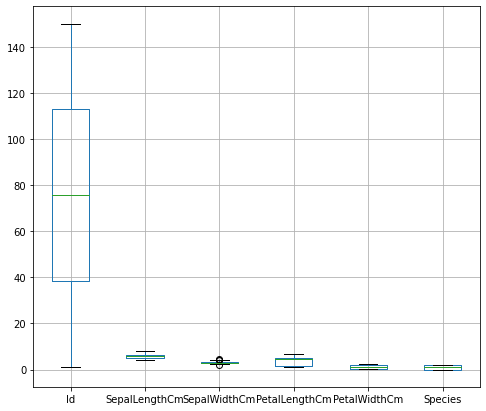

In [86]:
df.boxplot(figsize=(8,7))

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int32  
dtypes: float64(4), int32(1), int64(1)
memory usage: 6.6 KB


# Feature Selection

In [88]:
x=df.drop(["Species"],axis=1)
y=df["Species"]

In [89]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

In [90]:
x.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3
149,150,5.9,3.0,5.1,1.8


# Model Bulding

In [45]:
model= LogisticRegression()

import warnings
warnings.filterwarnings("ignore")

model.fit(x_train,y_train)

LogisticRegression()

# Evaluation

In [52]:
#for testing dataset
yp1 = model.predict(x_test)

mse= mean_squared_error(y_test,yp1)
print("mse is: ",mse)

rmse = np.sqrt(mse)
print("rmse is: ",rmse)

mae = mean_absolute_error(y_test,yp1)
print("mae is: ",mae)

r2 = r2_score(y_test,yp1)
print("r2_score : ",r2)

mse is:  0.0
rmse is:  0.0
mae is:  0.0
r2_score :  1.0


In [54]:
#for training dataset
yp2 = model.predict(x_train)

mse= mean_squared_error(y_train,yp2)
print("mse is: ",mse)

rmse = np.sqrt(mse)
print("rmse is: ",rmse)

mae = mean_absolute_error(y_train,yp2)
print("mae is: ",mae)

r2 = r2_score(y_train,yp2)
print("r2_score : ",r2)

mse is:  0.0
rmse is:  0.0
mae is:  0.0
r2_score :  1.0


# Testing on Single Row

In [56]:
column_names = x.columns
column_names

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [59]:
test_array = np.zeros(len(column_names))
test_array

array([0., 0., 0., 0., 0.])

In [66]:
Id =1.0
SepalLengthCm =6
SepalWidthCm  =4
PetalLengthCm =1.5
PetalWidthCm  =0.3

#Species =?

In [ ]:
test_array[0] = Id
test_array[1] = SepalLengthCm
test_array[2] = SepalWidthCm
test_array[3] = PetalLengthCm
test_array[4] = PetalWidthCm

In [74]:
project_data = {"Species":{int(0):"Iris-setosa",int(1):"Iris-versicolor",int(2):"Iris-virginica"},
                "Column_names":list(x.columns)
               }
project_data

{'Species': {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'},
 'Column_names': ['Id',
  'SepalLengthCm',
  'SepalWidthCm',
  'PetalLengthCm',
  'PetalWidthCm']}

In [70]:
with open("Logistic_regression.pickle", "wb") as f:
    pickle.dump(model,f)

In [75]:
with open("project_data.json", "w") as f:
    json.dump(project_data,f)